# Basic properties of the data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/home/arash/MEGA/MEGAsync/Machine Learning/Kaggle/Toxic/Data/train.csv')
print('shape is:(%i,%i)'%df.shape)
class_names=df.columns[2:].tolist()

text_normal=df.comment_text[(df.toxic==0) & (df.severe_toxic==0) & \
                            (df.obscene==0) & (df.threat==0) & \
                           (df.insult==0) & (df.identity_hate==0)].tolist();
texts_toxic=df.comment_text[df.toxic==1].tolist();
texts_severe_toxic=df.comment_text[df.severe_toxic==1].tolist();
texts_obscene=df.comment_text[df.obscene==1].tolist();
texts_threat=df.comment_text[df.threat==1].tolist();
texts_insult=df.comment_text[df.insult==1].tolist();
texts_identity_hate=df.comment_text[df.identity_hate==1].tolist();
df.head()

shape is:(159571,8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


## Percentage of data in each category

Next we plot the percentage of occurrence of each of the labels:

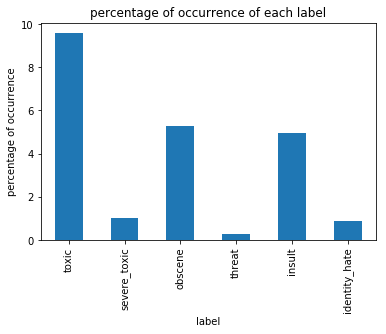

In [3]:
(100*df.iloc[:,2:].apply(sum)/df.shape[0]).plot('bar')
plt.xlabel('label');plt.ylabel('percentage of occurrence');
plt.title('percentage of occurrence of each label');

As we can see about 90% of the samples are not classified as any of the specified categories. So this is an unbalanced problem where 90% of the samples belong to one class.

## Most common words in each category

In [4]:
from keras.preprocessing.text import Tokenizer
T=Tokenizer()
T.fit_on_texts(texts_toxic)
print len(texts_toxic)

/home/arash/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


15294


In [6]:
import nltk
#nltk.download()
from nltk.corpus import stopwords
sw = stopwords.words('english')

most_common_words = sorted(filter(lambda x:not x[0] in sw,T.word_counts.items()),
                     key=lambda x:x[1],reverse=True)
highDocOcc_words = sorted(filter(lambda x:not x[0] in sw,T.word_docs.items()),
                     key=lambda x:x[1],reverse=True)
most_common_words[0:100]
highDocOcc_words[0:100]

/home/arash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  
/home/arash/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


[('fuck', 2447),
 ('like', 2107),
 ('wikipedia', 1895),
 ('get', 1680),
 ('fucking', 1619),
 ('go', 1535),
 ('page', 1522),
 ('know', 1334),
 ('people', 1288),
 ('shit', 1274),
 ('one', 1192),
 ('stop', 1115),
 ("i'm", 1112),
 ('think', 1038),
 ('article', 986),
 ('stupid', 958),
 ('talk', 938),
 ('ass', 899),
 ('want', 832),
 ('time', 825),
 ('life', 812),
 ('even', 811),
 ('would', 810),
 ('see', 769),
 ('make', 750),
 ('please', 720),
 ('edit', 714),
 ('bitch', 711),
 ('u', 707),
 ('little', 706),
 ('really', 681),
 ('suck', 661),
 ('right', 649),
 ('good', 640),
 ('going', 628),
 ('say', 624),
 ('also', 620),
 ('block', 620),
 ('way', 603),
 ('hell', 600),
 ('back', 595),
 ('well', 593),
 ('user', 590),
 ('idiot', 587),
 ('nothing', 578),
 ('asshole', 542),
 ('hey', 533),
 ('take', 525),
 ('dick', 523),
 ('give', 520),
 ('dont', 513),
 ('gay', 498),
 ('wiki', 495),
 ("can't", 494),
 ('ever', 494),
 ('never', 494),
 ('blocked', 490),
 ('edits', 479),
 ('need', 474),
 ('oh', 469),
 (

## Correlation between classes

In [7]:
df[class_names].corr()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000
